In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures

In [2]:
# from functools import reduce

# Получаем список всех датасетов
datasets = [pd.read_csv(f'data_{i}.csv', index_col=None) for i in range(1, 6)]

# Объединяем все датасеты в один большой датасет
big_dataset = pd.concat(datasets)

# Перемешиваем строки
df = big_dataset.sample(frac=1)
df = df.reset_index(drop=True)

# # Удаляем дубликаты и объединяем данные
# final_dataset = big_dataset.drop_duplicates(subset=pd.Index)

# Сохраняем объединенный датасет
df.to_csv('cian_dataset.csv', index=False)

In [2]:
# df = pd.read_csv('cian_dataset.csv', index_col=None)
df

,region,address,price,total_area,kitchen_area,living_area,rooms_count,floor,floors_number,build_date,...,cargo_elevator,metro,metro_distance,metro_transport,district,is_apartments,from_developer,is_auction,link,photos
0,msk,"Москва, Шмитовский проезд, 39к8",50380000,100.00,16.0,48.9,4,30,51,NaN,...,1.0,NaN,NaN,NaN,"Пресненский,ЦАО",0.0,1,0,https://www.cian.ru/sale/flat/293376098/,https://images.cdn-cian.ru/images/1980832582-1...
1,msk,"Москва, Западный административный округ, район...",61192912,103.84,NaN,NaN,4,45,57,NaN,...,2.0,"Фили,Багратионовская,Парк Победы","5,14,17","walk,walk,walk","Филевский парк,ЗАО",0.0,1,0,https://www.cian.ru/sale/flat/306068077/,https://images.cdn-cian.ru/images/2305344730-1...
2,msk,"Россия, Москва, улица Авиаконструктора Сухого,...",59200000,138.30,17.3,83.8,4,5,24,2017.0,...,NaN,"ЦСКА,Петровский Парк,Динамо","9,15,16","walk,walk,walk","Хорошевский,САО",NaN,0,0,https://www.cian.ru/sale/flat/308561316/,https://images.cdn-cian.ru/images/2295881875-1...
3,msk,"Москва, Береговой проезд, 2",61997125,125.70,36.2,56.6,4,2,13,NaN,...,1.0,"Фили,Шелепиха","4,7","transport,transport","Филевский парк,ЗАО",0.0,1,0,https://www.cian.ru/sale/flat/296921048/,https://images.cdn-cian.ru/images/2343557589-1...
4,msk,"Москва, Новомосковский административный округ,...",14555992,78.86,NaN,NaN,3,2,12,NaN,...,NaN,"Силикатная,Остафьево,Щербинка","5,8,11","transport,transport,transport","Рязановское,НАО (Новомосковский)",0.0,1,0,https://www.cian.ru/sale/flat/311021350/,https://images.cdn-cian.ru/images/2345302179-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7152,msk,"Москва, Новомосковский административный округ,...",9397710,63.93,NaN,NaN,2,2,7,NaN,...,NaN,"Рассказовка,Филатов Луг,Новопеределкино","21,23,23","transport,transport,transport","Первомайское,ТАО (Троицкий)",0.0,1,0,https://www.cian.ru/sale/flat/277241899/,https://images.cdn-cian.ru/images/55/933/631/1...
7153,msk,"Москва, Новомосковский административный округ,...",27513378,123.00,26.3,69.9,5,3,17,NaN,...,NaN,"Тёплый Стан,Бунинская аллея,Прокшино","14,10,15","transport,transport,transport","Сосенское,НАО (Новомосковский)",0.0,1,0,https://www.cian.ru/sale/flat/310898005/,https://images.cdn-cian.ru/images/2342784618-1...
7154,msk,"Россия, Москва, Басманный переулок, 5",71000000,117.00,10.0,81.6,4,5,12,2021.0,...,2.0,"Комсомольская,Красные ворота,Площадь трёх вокз...","6,8,12","walk,walk,walk","Красносельский,ЦАО",1.0,0,0,https://www.cian.ru/sale/flat/311067039/,https://images.cdn-cian.ru/images/2346488700-1...
7155,msk,"Москва, Варшавское шоссе",76574650,128.40,14.4,81.9,5,19,29,NaN,...,1.0,"Нагатинская,Верхние котлы,ЗИЛ","12,13,15","walk,walk,walk","Нагатино-Садовники,ЮАО",0.0,1,0,https://www.cian.ru/sale/flat/292586842/,https://images.cdn-cian.ru/images/2348376494-1...


In [5]:
df.describe()

,price,total_area,kitchen_area,living_area,rooms_count,floor,floors_number,build_date,is_complete,completion_year,balcony,passenger_elevator,cargo_elevator,is_apartments,from_developer,is_auction
count,7.157000e+03,7157.000000,5205.000000,4840.000000,7157.000000,7157.000000,7157.000000,2456.000000,3599.000000,3646.000000,3012.000000,5070.000000,3338.000000,5912.000000,7157.000000,7157.000000
mean,9.094127e+07,104.945810,17.734275,56.118161,2.972894,10.003912,19.002096,1997.943404,0.136982,2025.093253,0.690571,1.853057,1.317855,0.121617,0.486517,0.183177
std,1.714619e+08,78.739339,11.708349,48.212892,1.410391,10.119506,13.549193,31.692393,0.343877,1.695657,0.720164,2.585127,1.820517,0.326871,0.499853,0.386839
min,1.500000e+06,14.200000,2.000000,1.000000,1.000000,1.000000,1.000000,1840.000000,0.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.140483e+07,47.400000,10.000000,23.475000,2.000000,3.000000,9.000000,1986.000000,0.000000,2024.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,3.432150e+07,79.200000,15.200000,42.600000,3.000000,7.000000,16.000000,2010.000000,0.000000,2025.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,8.600000e+07,135.000000,20.800000,72.125000,4.000000,13.000000,24.000000,2020.000000,0.000000,2026.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000
max,3.306270e+09,700.000000,168.700000,399.000000,5.000000,82.000000,97.000000,2025.000000,1.000000,2028.000000,4.000000,34.000000,21.000000,1.000000,1.000000,1.000000


C:\Users\mails\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mails\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mails\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mails\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

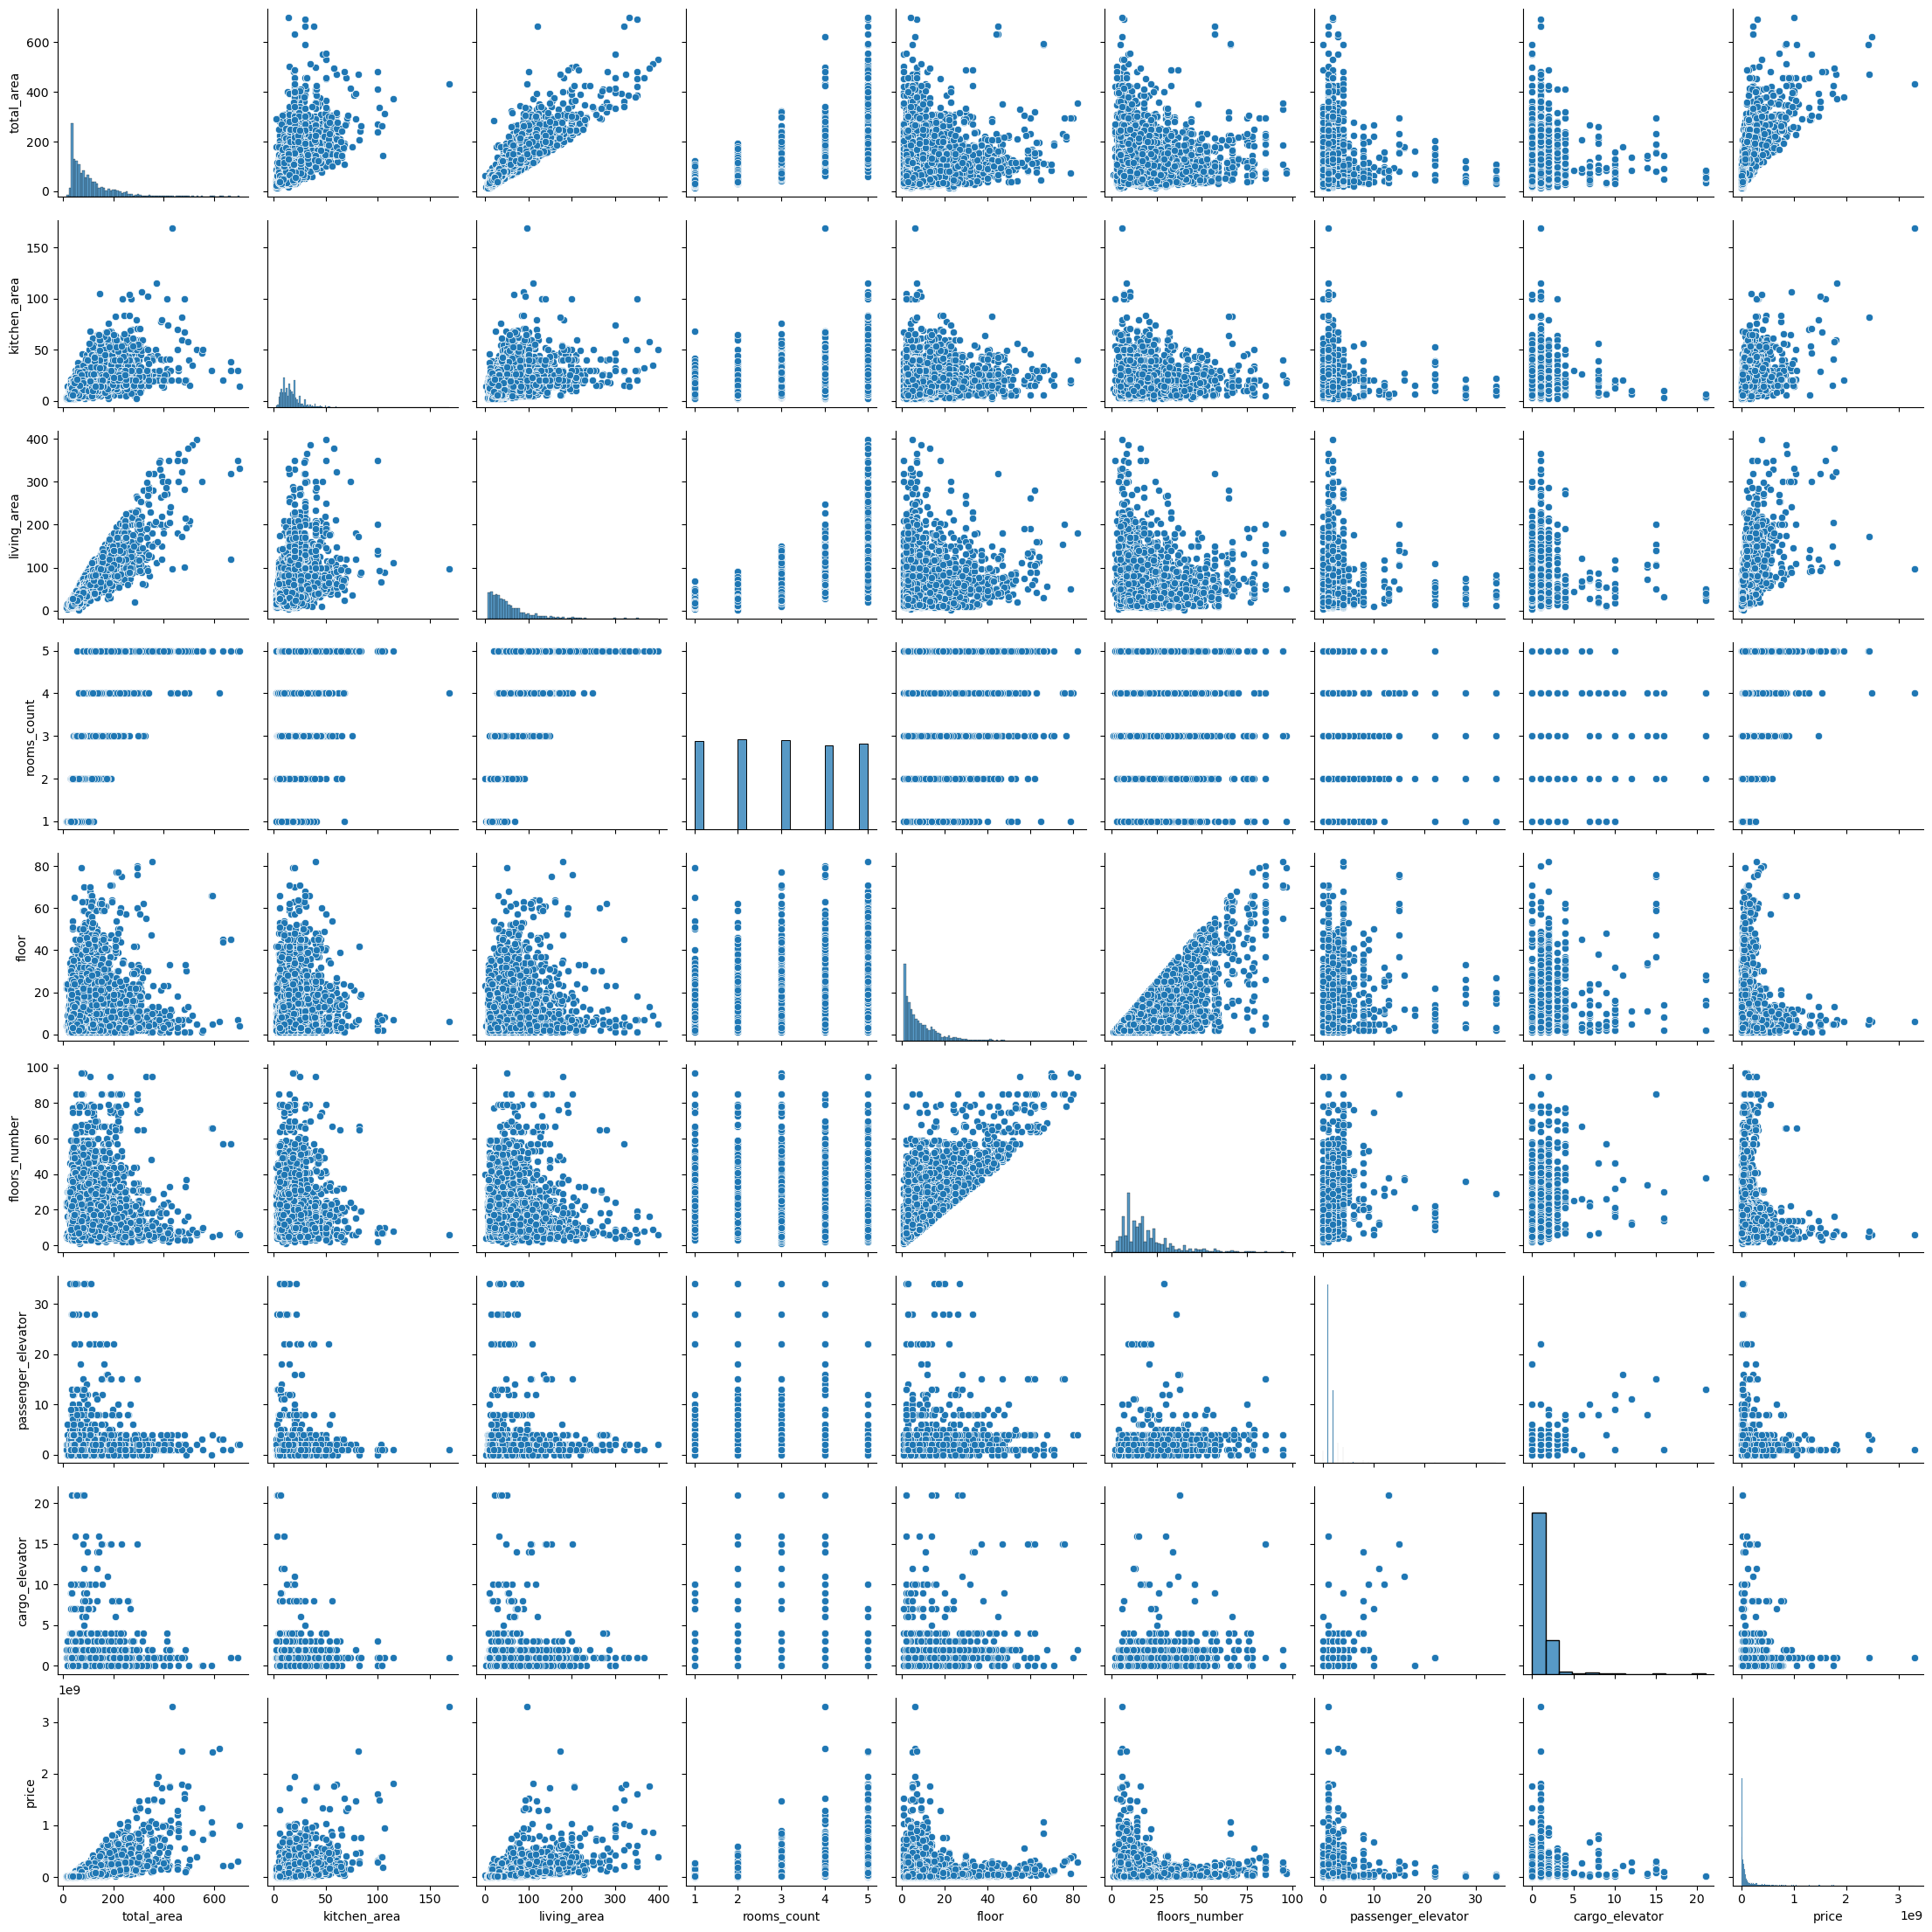

In [7]:
sns.pairplot(df[['total_area', 'kitchen_area', 'living_area', 'rooms_count', 'floor', 'floors_number',	'passenger_elevator', 'cargo_elevator', 'price']])

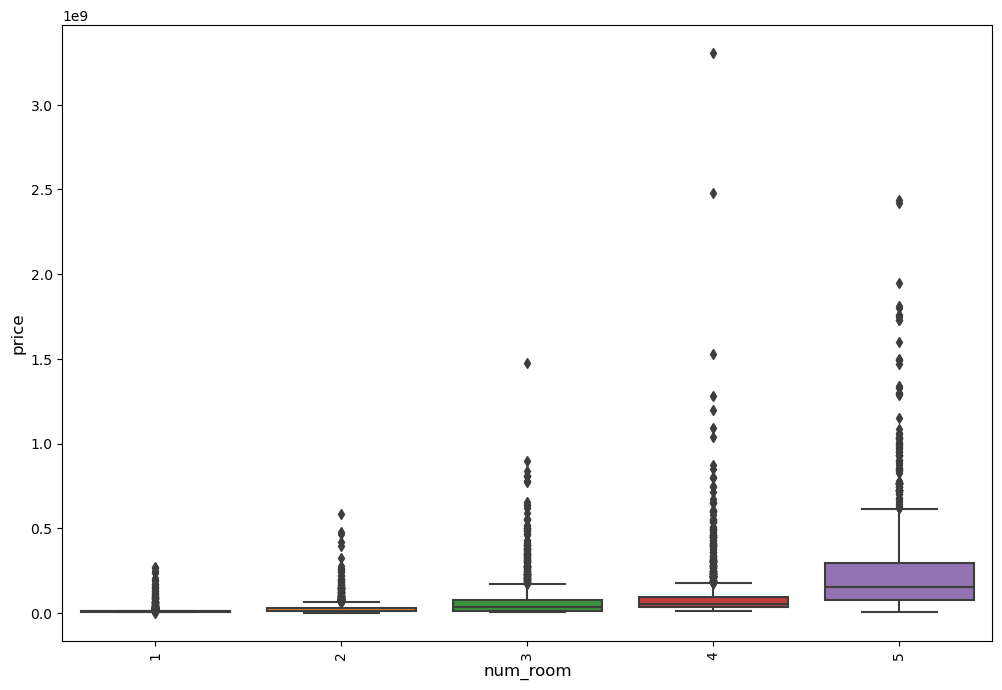

In [8]:
plt.figure(figsize=(12,8))
sns.boxplot(x='rooms_count', y='price', data=df)
plt.ylabel('price', fontsize=12)
plt.xlabel('num_room', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

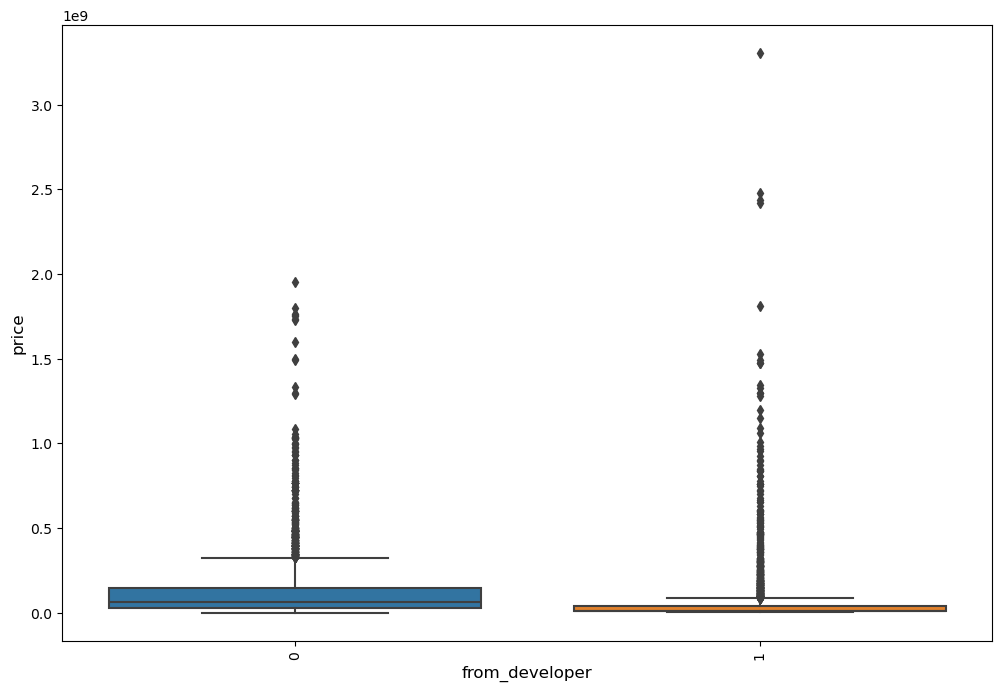

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(x='from_developer', y='price', data=df)
plt.ylabel('price', fontsize=12)
plt.xlabel('from_developer', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

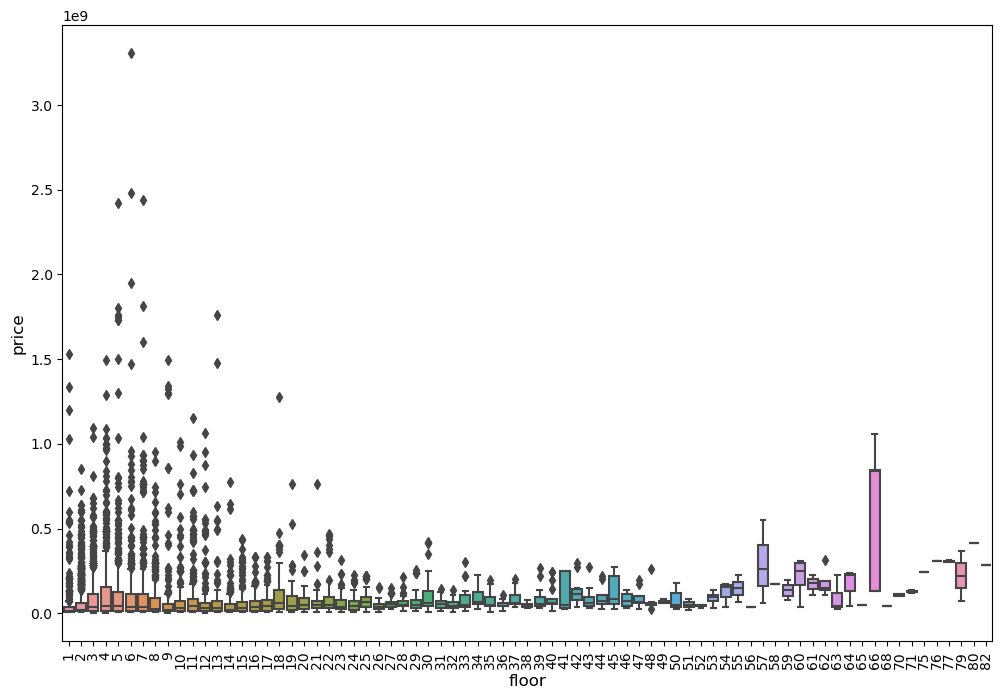

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(x='floor', y='price', data=df)
plt.ylabel('price', fontsize=12)
plt.xlabel('floor', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

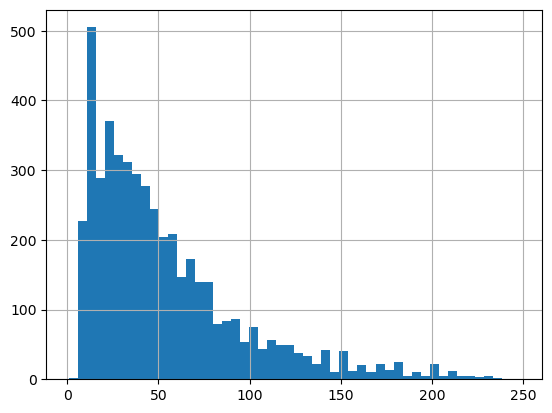

In [15]:
df[df.living_area<250].living_area.hist(bins=50)

In [17]:
bins = [0, 30, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90, 95, 100, 110, 120, 130, 140, 200, 500]
df['living_area_bins'] = np.searchsorted(bins, df.living_area.values)

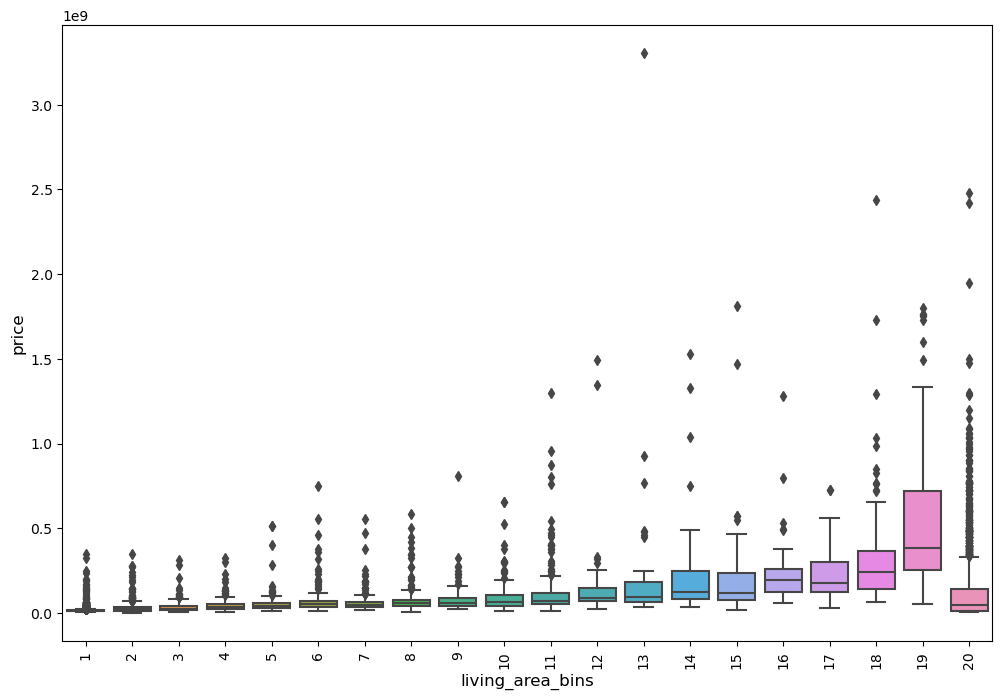

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x='living_area_bins', y='price', data=df)
plt.ylabel('price', fontsize=12)
plt.xlabel('living_area_bins', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

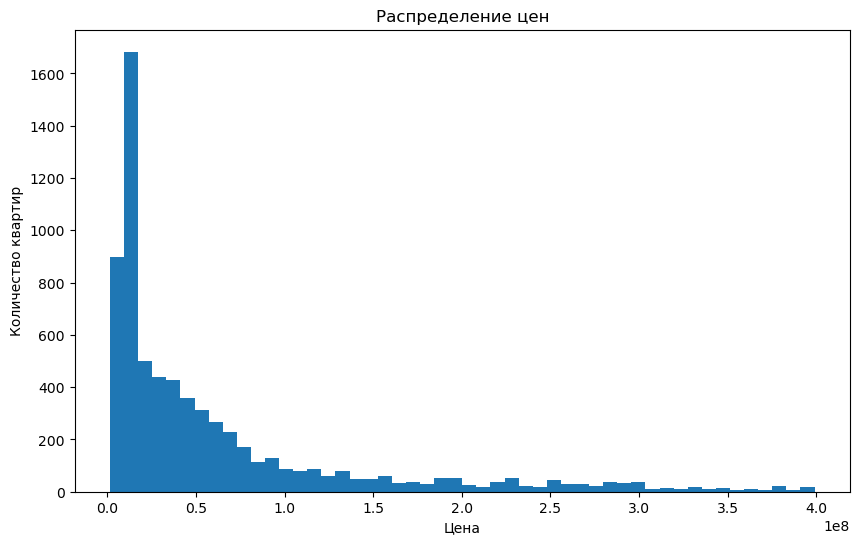

In [21]:
# Извлечем цены
prices = df[df['price']<400000000]['price']

# Постороение гистограммы для визуализации распределения цен
plt.figure(figsize=(10, 6))
plt.hist(prices, bins=50)
plt.title("Распределение цен")
plt.xlabel("Цена")
plt.ylabel("Количество квартир")
plt.show()

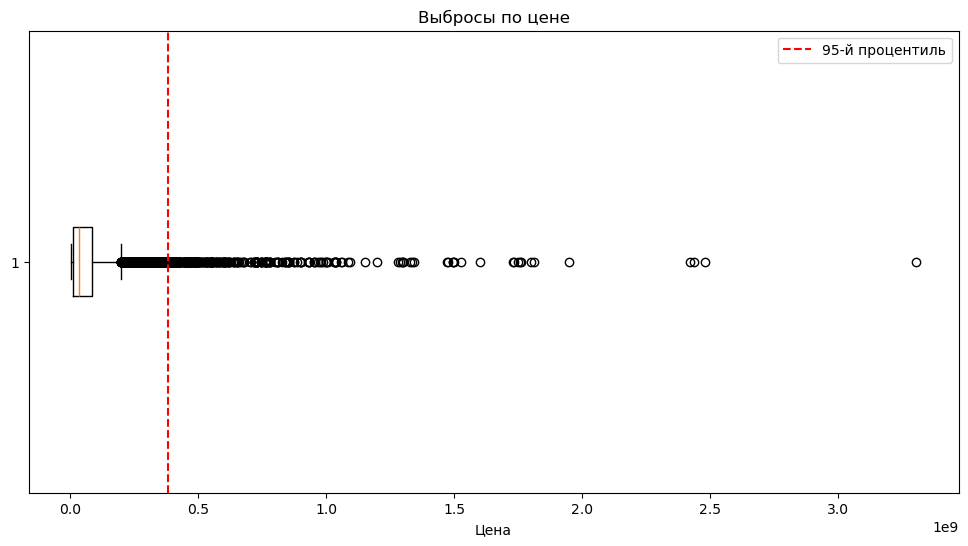

95-й процентиль цены: 380000000.0
Количество выбросов: 356


In [5]:
price_column = 'price'

# Рассчитываем 95-й процентиль
threshold_95 = df[price_column].quantile(0.95)

# Определяем выбросы
outliers = df[df[price_column] > threshold_95]

# Визуализация
plt.figure(figsize=(12, 6))
plt.boxplot(df[price_column], vert=False)
plt.title('Выбросы по цене')
plt.xlabel('Цена')
plt.axvline(threshold_95, color='red', linestyle='--', label='95-й процентиль')
plt.legend()
plt.show()

# Выводим информацию о выбросах
print("95-й процентиль цены:", threshold_95)
print("Количество выбросов:", len(outliers))

In [6]:
# удаляем выбросы по цене
df = df[df['price']<=360000000]

In [7]:
# Подсчёт количества строк с пустыми значениями в каждом столбце
df.isna().sum()

region                   0
address                  0
price                    0
total_area               0
kitchen_area          1833
living_area           2125
rooms_count              0
floor                    0
floors_number            0
build_date            4506
is_complete           3287
completion_year       3239
house_material         716
parking               2978
decoration            4677
balcony               3947
passenger_elevator    1971
cargo_elevator        3609
metro                   60
metro_distance          60
metro_transport         60
district                 0
is_apartments         1137
from_developer           0
is_auction               0
link                     0
photos                   4
dtype: int64

In [8]:
# Удаление строк, где хотя бы одно из значений в указанных столбцах равно NaN
columns_1 = ['metro', 'metro_distance', 'metro_transport', 'photos']
df.dropna(subset=columns_1, inplace=True)

C:\Users\mails\AppData\Local\Temp\ipykernel_18208\3082435900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=columns_1, inplace=True)


In [9]:
# считаем кол-во фото в каждом объявлении, если их слишком мало (меньше 8 фото), то удаляем объявление
df['num_links'] = df['photos'].str.split(',').str.len()
df = df[df['num_links']>=8]

C:\Users\mails\AppData\Local\Temp\ipykernel_18208\1561778091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_links'] = df['photos'].str.split(',').str.len()


In [10]:
def preprocessing(df):
    df.loc[:, ['is_complete']] = df.apply(lambda x:
    int(x.completion_year) < 2024 if pd.isna(x.is_complete) and not pd.isna(x.completion_year) else x.is_complete,
    axis=1)

    df.loc[:, ['is_complete']] = df.apply(lambda x: 
    int(x.build_date) < 2024 if pd.isna(x.is_complete) and not pd.isna(x.build_date) else x.is_complete, 
    axis=1)
    
    df.loc[:, ['is_complete']] = df.apply(lambda x: 
    x.from_developer == 0 if pd.isna(x.is_complete) and not pd.isna(x.from_developer) else x.is_complete, 
    axis=1) 
    
    df.loc[:, ['is_complete']] = df.apply(lambda x:
    int(x.is_auction) if pd.isna(x.is_complete) else x.is_complete, 
    axis=1)
    
    df.loc[:, ['decoration']] = df.apply(lambda x:
    'without' if pd.isna(x.decoration) and not x.is_complete else x.decoration, 
    axis=1)

    # чистовая
    df.loc[:, ['decoration']] = df.apply(lambda x:
    'fine' if pd.isna(x.decoration) and x.is_apartments and x.is_complete else x.decoration, 
    axis=1)

    # панельный
    df.loc[:, ['house_material']] = df.apply(lambda x:
    'panel' if pd.isna(x.house_material) and not pd.isna(x.build_date)
    and 1955 <= int(x.build_date) <= 1995 else x.house_material, 
    axis=1)

    # кирпичный
    df.loc[:, ['house_material']] = df.apply(lambda x:
    'brick' if pd.isna(x.house_material) and not pd.isna(x.build_date)
    and 1900 <= int(x.build_date) <= 1955 else x.house_material, 
    axis=1)

    # монолитный
    df.loc[:, ['house_material']] = df.apply(lambda x:
    'monolith' if pd.isna(x.house_material) and not pd.isna(x.build_date)
    and 1995 <= int(x.build_date) <= 2024 else x.house_material, 
    axis=1)

    df.loc[df['house_material'] == 'stalin', 'house_material'] = 'brick';
    
    df.loc[:, ['passenger_elevator']] = df.apply(lambda x:
    0 if pd.isna(x.passenger_elevator) 
    and x.floors_number in np.arange(1, 4) else x.passenger_elevator, 
    axis=1)

    df.loc[:, ['passenger_elevator']] = df.apply(lambda x:
    0 if pd.isna(x.passenger_elevator) 
    and x.house_material in ('brick', 'panel', 'block') 
    and x.floors_number == 5 else x.passenger_elevator, 
    axis=1)

    df.loc[:, ['passenger_elevator']] = df.apply(lambda x:
    1 if pd.isna(x.passenger_elevator) 
    and x.floors_number in np.arange(6, 11) else x.passenger_elevator,
    axis=1)

    df.loc[:, ['passenger_elevator']] = df.apply(lambda x:
    2 if pd.isna(x.passenger_elevator) 
    and x.floors_number in np.arange(11, 21) else x.passenger_elevator, 
    axis=1)

    df.loc[:, ['passenger_elevator']] = df.apply(lambda x:
    3 if pd.isna(x.passenger_elevator) 
    and x.floors_number in np.arange(21, 26) else x.passenger_elevator, 
    axis=1)
    
    df.loc[:, ['passenger_elevator']] = df.apply(lambda x:
    4 if pd.isna(x.passenger_elevator) 
    and x.floors_number in np.arange(26, 100) else x.passenger_elevator, 
    axis=1)
    
    df.loc[:, ['cargo_elevator']] = df.apply(lambda x:
    1 if pd.isna(x.cargo_elevator)
    and x.passenger_elevator == 0                                         
    and x.floors_number in np.arange(1, 13) else x.cargo_elevator, 
    axis=1)

    df.loc[:, ['cargo_elevator']] = df.apply(lambda x:
    0 if pd.isna(x.cargo_elevator)                                      
    and x.floors_number in np.arange(1, 13) else x.cargo_elevator, 
    axis=1)

    df.loc[:, ['cargo_elevator']] = df.apply(lambda x:
    1 if pd.isna(x.cargo_elevator) 
    and x.floors_number in np.arange(13, 23)
    and x.passenger_elevator in (1, 2) else x.cargo_elevator, 
    axis=1)

    df.loc[:, ['cargo_elevator']] = df.apply(lambda x:
    2 if pd.isna(x.cargo_elevator) 
    and x.floors_number in np.arange(23, 30)
    and x.passenger_elevator in (1, 2) else x.cargo_elevator, 
    axis=1)

    df.loc[:, ['cargo_elevator']] = df.apply(lambda x:
    1 if pd.isna(x.cargo_elevator) 
    and x.floors_number in np.arange(23, 30)
    and x.passenger_elevator > 2 else x.cargo_elevator, 
    axis=1)

    df.loc[:, ['cargo_elevator']] = df.apply(lambda x:
    2 if pd.isna(x.cargo_elevator) 
    and x.floors_number in np.arange(30, 100) else x.cargo_elevator, 
    axis=1)
    
    df.loc[:, ['parking']] = df.apply(lambda x:
    'without' if pd.isna(x.parking) else x.parking, 
    axis=1)
    
    df.loc[:, ['living_area']] = df.apply(lambda x:
    float(x.total_area) - float(x.kitchen_area) if pd.isna(x.living_area) and not pd.isna(x.kitchen_area) else x.living_area
    , axis=1)
    
    df.loc[:, ['kitchen_area']] = df.apply(lambda x:
    float(x.total_area) - float(x.living_area) if pd.isna(x.kitchen_area) and not pd.isna(x.living_area) else x.kitchen_area,
    axis=1)

    df.loc[:, ['kitchen_area']] = df.apply(lambda x:
    6 if pd.isna(x.kitchen_area)
    and x.rooms_count == 1 and x.total_area < 40 else x.kitchen_area,
    axis=1)

    df.loc[:, ['kitchen_area']] = df.apply(lambda x:
    8 if pd.isna(x.kitchen_area) else x.kitchen_area,
    axis=1)

    df.loc[:, ['living_area']] = df.apply(lambda x:
    float(x.total_area) - float(x.kitchen_area) if pd.isna(x.living_area) and not pd.isna(x.kitchen_area) else x.living_area
    , axis=1)

    df.loc[:, ['is_apartments']] = df.apply(lambda x:
    0 if pd.isna(x.is_apartments)
    and x.rooms_count > 2 else x.is_apartments,
    axis=1)

    df.loc[:, ['is_apartments']] = df.apply(lambda x:
    1 if pd.isna(x.is_apartments)
    and x.rooms_count == 1 and x.total_area < 28 else x.is_apartments,
    axis=1)

    df.loc[:, ['is_apartments']] = df.apply(lambda x:
    1 if pd.isna(x.is_apartments)
    and x.rooms_count == 2 and x.total_area < 44 else x.is_apartments,
    axis=1)
     
    return df

In [11]:
def feature_engineering(data): 

    # Присвоение значений для флагов этажей
    data.loc[:, 'is_first_floor'] = data.apply(lambda x: 1 if x.floor == 1 else 0, axis=1)
    data.loc[:, 'is_last_floor'] = data.apply(lambda x: 1 if x.floor == x.floors_number else 0, axis=1)

    # Присвоение значений для наличия метро
    data.loc[:, 'has_metro'] = data.apply(lambda x: 0 if pd.isna(x.metro) else 1, axis=1)
    
    # Присвоение среднего значения расстояния до метро
    data.loc[:, 'mean_metro'] = data.apply(lambda x: float(0) if x.has_metro == 0 else sum(map(float, x.metro_distance.split(','))) / len(x.metro_distance.split(',')), axis=1)

    # Применение функции для вычисления расстояния до метро
    data.loc[:, 'metro_dist'] = data.apply(calculate_mean_distance, axis=1)

    # Доля жилой площади
    data.loc[:, 'living_area_ratio'] = data['living_area'] / data['total_area']

    # Общее количество лифтов
    data.loc[:, 'total_elevators'] = data['passenger_elevator'] + data['cargo_elevator']
    
    # Средняя площадь на комнату
    data.loc[:, 'area_per_room'] = data['living_area'] / data['rooms_count'].replace(0, pd.NA)  # Избегаем деления на ноль

    # Загруженность лифтов - сколько этажей на один лифт
    data.loc[:, 'elevators_ratio'] = data['floors_number'] / data['total_elevators'].replace(0, pd.NA)
    
    # Приведение типа колонки 'district'
    data.loc[:, 'district'] = data['district'].astype('str')
    # Присвоение оценок по районам
    data['rate'] = data.apply(lambda row: apply_rating(row['district'], globals()[f'rate_{row["region"]}']), axis=1)
    
    return data


def calculate_mean_distance(row):
    distances = [int(x) for x in str(row['metro_distance']).split(',') if x.isdigit()]
    transports = str(row['metro_transport']).split(',')

    total_distance = 0

    for i in range(len(distances)):
        if transports[i] == 'walk':
            total_distance += distances[i] / 60 * 5  # Скорость ходьбы: ~5 км/час
        elif transports[i] == 'transport':
            total_distance += distances[i] / 60 * 40  # Скорость транспорта: ~40 км/час
    
    if len(distances) > 0:
        return total_distance / len(distances)
    else:
        return None

rate_msk = {
  'ЦАО' : 1,
  'ЗАО' : 2,
  'ЮАО' : 6,
  'САО' : 5,
  'ЮЗАО' : 3,
  'ВАО' : 8,
  'СЗАО' : 4,
  'СВАО' : 7,
  'ЮВАО' : 9,
  'ТАО (Троицкий)' : 12,
  'НАО (Новомосковский)' : 11,
  'Московский,НАО (Новомосковский)' : 10,
  'Крюково,ЗелАО' : 13
}

def apply_rating(district, rate_dict):
    districts = district.split(',')
    for d in districts:
        d = d.strip()  # Удаляем лишние пробелы
        if d in rate_dict:
            return rate_dict[d]
    return None  # Если район отсутствует в словаре


In [12]:
def imputing_encoding(data):
    num_f = [
        'total_area',
        'floor',
        'floors_number',
        'living_area',
        'kitchen_area',
        'mean_metro',
        'metro_dist',
        'rooms_count',
        'passenger_elevator',
        'cargo_elevator',
        'living_area_ratio',
        'total_elevators',
        'area_per_room',
        'elevators_ratio'
        
    ]

    cat_f = [
        'decoration',
        'parking',
        'house_material',
        'rate'
    ]

    cat_f_0 = [
        'is_complete',
        'is_apartments',
        'from_developer',
        'is_first_floor',
        'is_last_floor',
        'has_metro'
    ]

    link = ['photos', 'link']
    target = ['price']

    # Создаем копию датафрейма с нужными столбцами
    data = data.loc[:, target + num_f + cat_f + cat_f_0 + link].copy() 

    # Преобразуем числовые столбцы и заполняем пропуски
    for f in num_f:
        data[f] = pd.to_numeric(data[f], errors='coerce')

    # Импутация числовых признаков
    num_imp = IterativeImputer(random_state=42, max_iter=10)
    data[num_f] = num_imp.fit_transform(data[num_f])

    # Стандартизация числовых признаков
    data[num_f] = StandardScaler().fit_transform(data[num_f])

    # Импутация категориальных признаков
    cat_imp = SimpleImputer(strategy='most_frequent')
    data[cat_f] = cat_imp.fit_transform(data[cat_f])
    data[cat_f_0] = cat_imp.fit_transform(data[cat_f_0])
    
    # One-hot кодирование категориальных признаков без потерь
    one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
    data_cat = pd.DataFrame(one_hot_encoder.fit_transform(data[cat_f]),
                             columns=one_hot_encoder.get_feature_names_out(cat_f), index=data.index)

    # Объединение датафреймов
    data = pd.concat([data[num_f], data_cat, data[cat_f_0], data[link], data[target]], axis=1)

    # Создание полиномиальных признаков
    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_features = poly.fit_transform(data[num_f])
    
    # Создаем новый датафрейм с полиномиальными признаками
    poly_feature_names = poly.get_feature_names_out(num_f)
    poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=data.index)

    # Объединяем DataFrame с полиномиальными признаками с основным DataFrame
    data = pd.concat([data, poly_df], axis=1)
    data = data.reset_index(drop=True)

    data.to_csv('preprocessed_data.csv', index=False)

    return data


In [13]:
df1 = preprocessing(df.copy())
df2 = feature_engineering(df1)
df3 = imputing_encoding(df2)

C:\Users\mails\AppData\Local\Temp\ipykernel_18208\3097790141.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0 nan 0.0 ... nan 0.0 0.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, ['is_complete']] = df.apply(lambda x:
